In [1]:
import sys
sys.path.append('D:\code\pywfn')
from pywfn.base import Mol
from pywfn.reader import LogReader
import matplotlib.pyplot as plt
from pywfn.spaceProp import lutils
from pywfn.maths import cubeGrid

动态链接库目录 D:\code\pywfn\pywfn\libs
当前系统:windows


## 波函数

In [2]:
from pywfn.spaceProp import wfnfunc

In [3]:
paths=[
  "D:\gfile\pywfn\C6H6.log"
]
mols=[Mol(LogReader(path)) for path in paths]

(104, 116, 22)


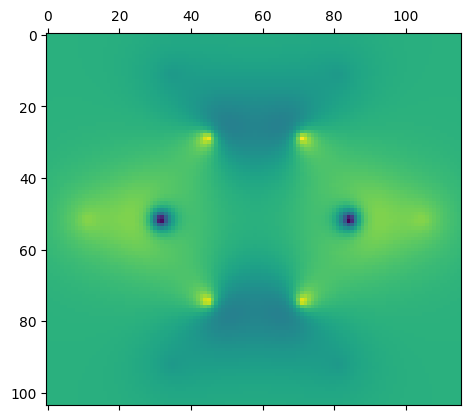

In [7]:
mol=mols[0]
caler=wfnfunc.Calculator(mol)
p0,p1=lutils.get_molBorder(mol) # 获取分子边界
shape,grid=cubeGrid(p0,p1,0.1,1)# 生成网格坐标
print(shape)
cubeVals=caler.obtWfns(grid,[10])
mat=cubeVals[0].reshape(*shape)
plt.matshow(mat[:,:,11])

(104, 116, 22)


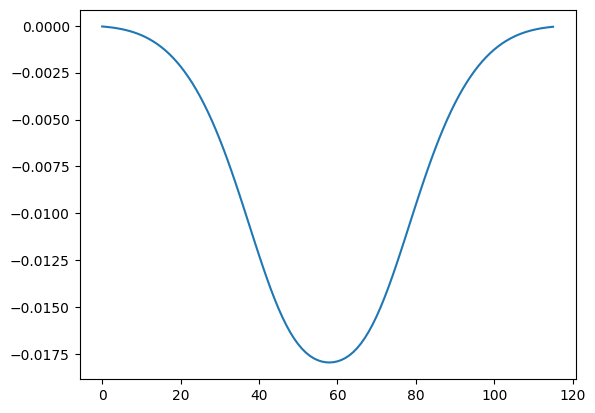

In [12]:
mol=mols[0]
caler=wfnfunc.Calculator(mol)
p0,p1=lutils.get_molBorder(mol) # 获取分子边界
shape,grid=cubeGrid(p0,p1,0.1,1)# 生成网格坐标
print(shape)
cubeVals=caler.atmWfns(grid,[1,2,3,4,5,6],10)
mat=cubeVals.reshape(*shape)
plt.plot(mat[0,:,11])

### HMO波函数

In [1]:
import sys
sys.path.append('D:\code\pywfn')
from pywfn.base import Mol
from pywfn.reader import LogReader
from pywfn.spaceProp import hmowfn,lutils
from pywfn.maths import cubeGrid
import matplotlib.pyplot as plt

动态链接库目录 D:\code\pywfn\pywfn\libs
当前系统:windows


1 [[-0.9769 -0.2137 -0.    ]
 [ 0.2137 -0.9769 -0.    ]
 [ 0.     -0.      1.    ]]
2 [[-0.6252 -0.7804  0.    ]
 [ 0.7804 -0.6252  0.    ]
 [ 0.      0.      1.    ]]
3 [[-0.3592 -0.9333  0.    ]
 [ 0.9333 -0.3592  0.    ]
 [ 0.      0.      1.    ]]
4 [[-0.7422 -0.6701  0.    ]
 [ 0.6701 -0.7422 -0.    ]
 [ 0.      0.      1.    ]]
5 [[-0.2492 -0.9684 -0.    ]
 [ 0.9684 -0.2492  0.    ]
 [-0.      0.      1.    ]]
6 [[-0.9488 -0.3159  0.    ]
 [ 0.3159 -0.9488  0.    ]
 [ 0.      0.      1.    ]]


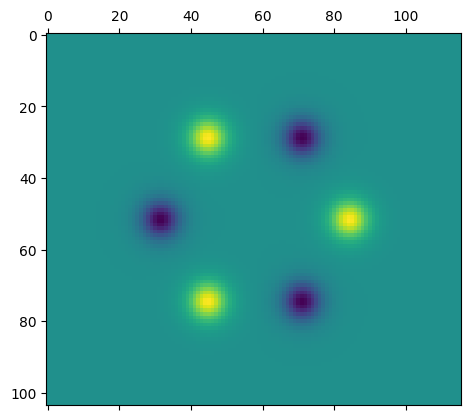

In [5]:
path="D:\gfile\pywfn\C6H6.log"
mol=Mol(LogReader(path))
caler=hmowfn.Calculator(mol)
p0,p1=lutils.get_molBorder(mol) # 获取分子边界
shape,grid=cubeGrid(p0,p1,0.1,1)# 生成网格坐标
caler.set_grid(grid)
wfn=caler.obtWfn(0)
mat=wfn.reshape(shape)
plt.matshow(mat[:,:,5])

## 电子密度

In [13]:
import sys
sys.path.append('D:\code\pywfn')
from pywfn.base import Mol
from pywfn.reader import LogReader
import matplotlib.pyplot as plt
from pywfn.spaceProp import lutils
from pywfn.maths import cubeGrid
from pywfn.spaceProp import potential
from pywfn.spaceProp import dftgrid,density

(104, 116, 22)


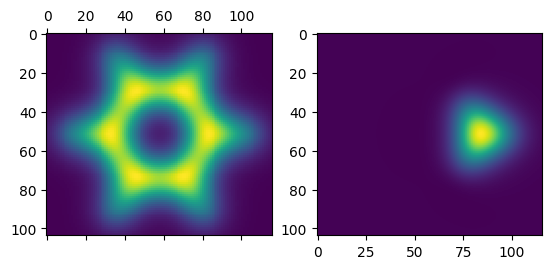

In [14]:
path="D:\gfile\pywfn\C6H6.log"
mol=Mol(LogReader(path))
caler=density.Calculator(mol)
p0,p1=lutils.get_molBorder(mol) # 获取分子边界
size,grid=cubeGrid(p0,p1,0.1,1)# 生成网格坐标
print(size)
fig,axs=plt.subplots(1,2)
vals=caler.molDens_lib(grid)
cube=vals.reshape(*size)
axs[0].matshow(cube[:,:,0])
vals=caler.atmDens(grid,[1])
mat1=vals.reshape(*size)
axs[1].imshow(mat1[:,:,0])

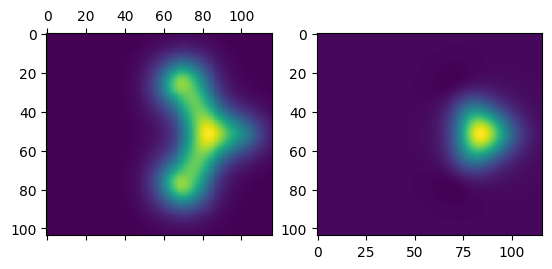

In [5]:
path="D:/gfile/pywfn/分子片段/C6H6_part.out"
mol=Mol(LogReader(path))
caler=density.Calculator(mol)
fig,axs=plt.subplots(1,2)
caler.set_grid(grid)
vals=caler.molDens_lib()
cube=vals.reshape(*shape)
axs[0].matshow(cube[:,:,0])
vals=caler.atmDens(1,grid)
mat2=vals.reshape(*shape)
axs[1].imshow(mat2[:,:,0])


-0.04058734045688084 0.00833536855524465


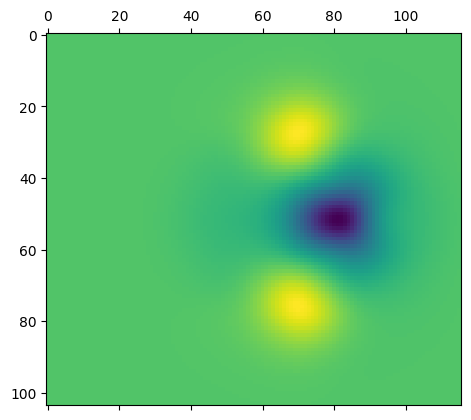

In [9]:
dmat=mat1-mat2
print(dmat.min(),dmat.max())
plt.matshow(mat1[:,:,0]-mat2[:,:,0])

## 静电势

In [15]:
import sys
sys.path.append('D:\code\pywfn')
from pywfn.base import Mol
from pywfn.reader import LogReader
import matplotlib.pyplot as plt
from pywfn.spaceProp import lutils
from pywfn.maths import cubeGrid
from pywfn.spaceProp import potential
from pywfn.spaceProp import dftgrid

In [16]:
path="D:\gfile\pywfn\C6H6.log"
mol=Mol(LogReader(path))
p0,p1=lutils.get_molBorder(mol) # 获取分子边界


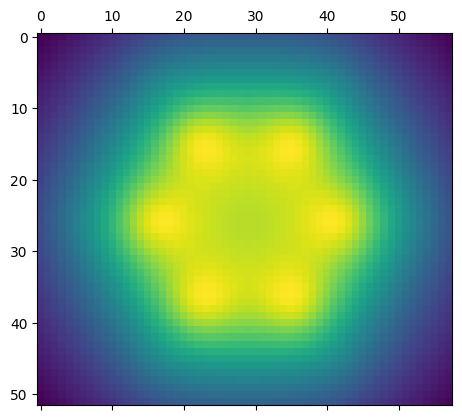

In [18]:
shape,grid=cubeGrid(p0,p1,0.2,1)# 生成网格坐标
caler=potential.Calculator(mol)
vals=caler.nucPotential_lib(grid)
cube=vals.reshape(*shape)
plt.matshow(cube[:,:,0])

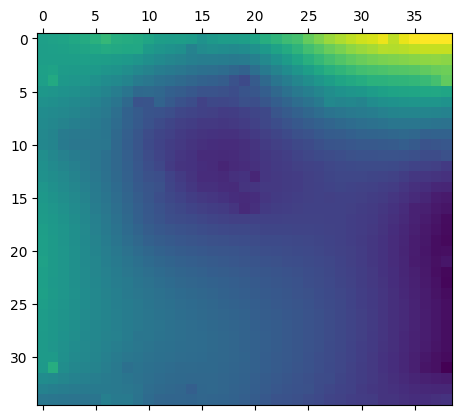

In [ ]:
shape,grid=cubeGrid(p0,p1,0.3,1)# 生成网格坐标
from pywfn.maths import rectGrid
rectGrid()
caler=potential.Calculator(mol)
vals=caler.elePotential_lib(grid)
cube=vals.reshape(*shape)
plt.matshow(cube[:,:,0])

In [9]:
from pywfn.spaceProp import lutils
from pywfn.maths import march
cube=march.cord2cube(shape,grid,vals)
vert=march.cube2vert(cube,1)

ValueError: need at least one array to concatenate

cgfs_
int32
int32
moldens_
elePotential_


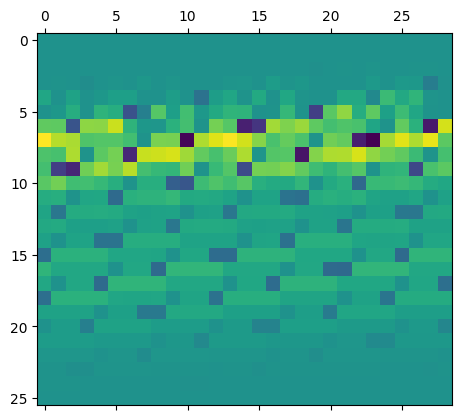

In [6]:
shape,grid=cubeGrid(p0,p1,0.4,1)# 生成网格坐标
caler=potential.Calculator(mol)
caler.set_grid(grid)
cubeVals=caler.elePotential_lib().reshape(*shape)
plt.matshow(cubeVals[:,:,0])

In [18]:
import numpy as np
